In [1]:
from neighbours.knn import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
def load_data(path):
        f = open(path)
        label = []
        data = []
        for line in f.readlines():
            line = line.strip().split('\t')
            label.append(int(line[-1])-1)
            data.append(list(map(float, line[:-1])))
        f.close()
        return np.array(data), np.array(label)


def split_data(data, label):
    train_size = int(data.shape[0] * 0.7)
    
    train_data = data[: train_size]
    train_label = label[: train_size]
    norm = StandardScaler()
    norm.fit(train_data)
    train_data = norm.transform(train_data)

    test_data = data[train_size:]
    test_label = label[train_size:]
    test_data = norm.transform(test_data)
    
    return train_data, train_label, test_data, test_label

### Test knn

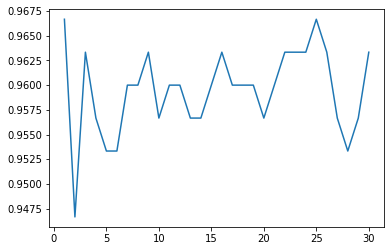

best Ks are [ 1 25]


In [3]:
data, label = load_data('./data/knn/datingTestSet2.txt')
train_data, train_label, test_data, test_label = split_data(data, label)
acc_list = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_label)
    y_pred = knn.predict(test_data)
    acc = (y_pred == test_label).sum() / test_label.shape[0]
    acc_list.append(acc)
plt.plot(list(range(1,31)), acc_list)
plt.show()
best = np.max(acc_list)
best = np.where(acc_list == best)[0] + 1
print(f'best Ks are {best}')

### Compare the compute cost

In [25]:
import time
knn = KNeighborsClassifier(algorithm='kd_tree')
knn.fit(train_data, train_label)
time_now = time.time()
results = knn.predict(test_data)
cost_kd = time.time() - time_now
print(cost_kd)
acc = (results == test_label).sum() / test_label.shape[0]
print(acc)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_label)
time_now = time.time()
results = knn.predict(test_data)
cost_naive = time.time() - time_now
print(cost_naive)
acc = (results == test_label).sum() / test_label.shape[0]
print(acc)

0.006999969482421875
0.9533333333333334
0.007002115249633789
0.9533333333333334
